In [3]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv('mer_imputed_merged_data.csv')
df.head(5)

,datetime,direct_radiation (W/m²),PM25_MER,PM10_MER,SO2_MER,O3_MER,NO2_MER,CO_MER,RH_MER,TMP_MER,WDR_MER,WSP_MER,is_festival,is_weekend,AirQualityIndex
0,2020-11-25 01:00:00,0,35.0,72.0,8.0,1.0,47.0,1.8,44.0,15.6,256.0,0.5,0,0,4
1,2020-11-25 02:00:00,0,43.0,73.0,7.0,1.0,43.0,1.3,47.0,15.0,296.0,0.7,0,0,4
2,2020-11-25 03:00:00,0,37.0,60.0,6.0,1.0,39.0,0.9,49.0,14.4,302.0,0.5,0,0,4
3,2020-11-25 04:00:00,0,34.0,51.0,4.0,1.0,37.0,0.4,51.0,13.6,320.0,0.7,0,0,4
4,2020-11-25 05:00:00,0,28.0,59.0,5.0,1.0,40.0,0.7,56.0,12.6,90.0,1.2,0,0,4


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [9]:
#converting datetime into date variable
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract month and year
df['Month'] = df['datetime'].dt.month
df['Year'] = df['datetime'].dt.year
df['Day'] = df['datetime'].dt.day

daily_country_city_summary = df.groupby(['Year', 'Month','Day']).agg({
    'PM25_MER': 'mean',
    'PM10_MER': 'mean',
    'SO2_MER': 'mean',
    'O3_MER': 'mean',
    'NO2_MER': 'mean',
    'CO_MER': 'mean',
     'RH_MER': 'mean',
     'TMP_MER': 'mean',
     'WDR_MER': 'mean',
    'WSP_MER': 'mean',
    'AirQualityIndex': 'mean',
    'RH_MER': 'mean',
    'TMP_MER': 'mean',
    'WDR_MER': 'mean',
    'WSP_MER': 'mean',
    'is_festival': 'max',
    'is_weekend': 'max'
    
}).reset_index()

# Display the first few rows
daily_country_city_summary.head()

,Year,Month,Day,PM25_MER,PM10_MER,SO2_MER,O3_MER,NO2_MER,CO_MER,RH_MER,TMP_MER,WDR_MER,WSP_MER,AirQualityIndex,is_festival,is_weekend
0,2020,11,25,32.130435,69.086957,5.043478,22.000000,44.652174,0.773913,36.782609,18.491304,191.260870,1.773913,3.956522,0,0
1,2020,11,26,23.625000,52.708333,4.375000,16.666667,42.250000,0.633333,31.041667,19.145833,266.083333,1.641667,2.916667,0,0
2,2020,11,27,27.791667,60.666667,6.138455,16.367188,43.550347,0.718520,28.250000,18.758333,167.958333,1.545833,3.166667,0,0
3,2020,11,28,31.291667,63.875000,4.708333,23.041667,46.458333,0.804167,30.500000,18.375000,137.958333,1.266667,3.250000,0,1
4,2020,11,29,37.291667,70.291667,4.750000,37.583333,41.250000,0.795833,40.083333,17.991667,160.458333,1.500000,4.625000,0,1


It aggregates the dataset into monthly averages for pollutants (PM25_MER, PM10_MER, etc.), weather variables (TMP_MER, RH_MER, etc.).

In [11]:
monthly_country_city_summary = daily_country_city_summary.groupby(['Year', 'Month']).agg({
    'PM25_MER': 'mean',
    'PM10_MER': 'mean',
    'SO2_MER': 'mean',
    'O3_MER': 'mean',
    'NO2_MER': 'mean',
    'CO_MER': 'mean',
     'RH_MER': 'mean',
     'TMP_MER': 'mean',
     'WDR_MER': 'mean',
    'WSP_MER': 'mean',
    'AirQualityIndex': 'mean',
    'RH_MER': 'mean',
    'TMP_MER': 'mean',
    'WDR_MER': 'mean',
    'WSP_MER': 'mean',
    'is_festival': 'sum',
    'is_weekend': 'sum'
    
}).reset_index()

monthly_country_city_summary.rename(columns={'is_festival': 'festival_days','is_weekend': 'weekend_days'}, inplace=True)
monthly_country_city_summary.head()

,Year,Month,PM25_MER,PM10_MER,SO2_MER,O3_MER,NO2_MER,CO_MER,RH_MER,TMP_MER,WDR_MER,WSP_MER,AirQualityIndex,festival_days,weekend_days
0,2020,11,32.230072,64.445048,6.377544,22.651476,42.367087,0.695961,37.741546,18.199245,201.008756,1.662319,3.374698,0,2
1,2020,12,27.474938,50.877254,6.966398,22.267305,35.179407,0.518394,48.509353,16.462931,169.529178,1.897919,3.587366,2,8
2,2021,1,24.902308,47.635528,4.111451,20.706919,35.183120,0.644316,45.971774,16.178243,177.399252,1.786507,3.415381,1,10
3,2021,2,26.907645,55.477493,7.539760,28.646205,33.664559,0.557473,32.117560,17.698602,172.549107,2.091220,3.443452,3,8
4,2021,3,28.957731,61.109585,7.064138,34.281138,30.937640,0.424223,31.948925,20.039400,172.650538,2.174731,3.385753,2,8


## Pollutant Trends by Month and Year

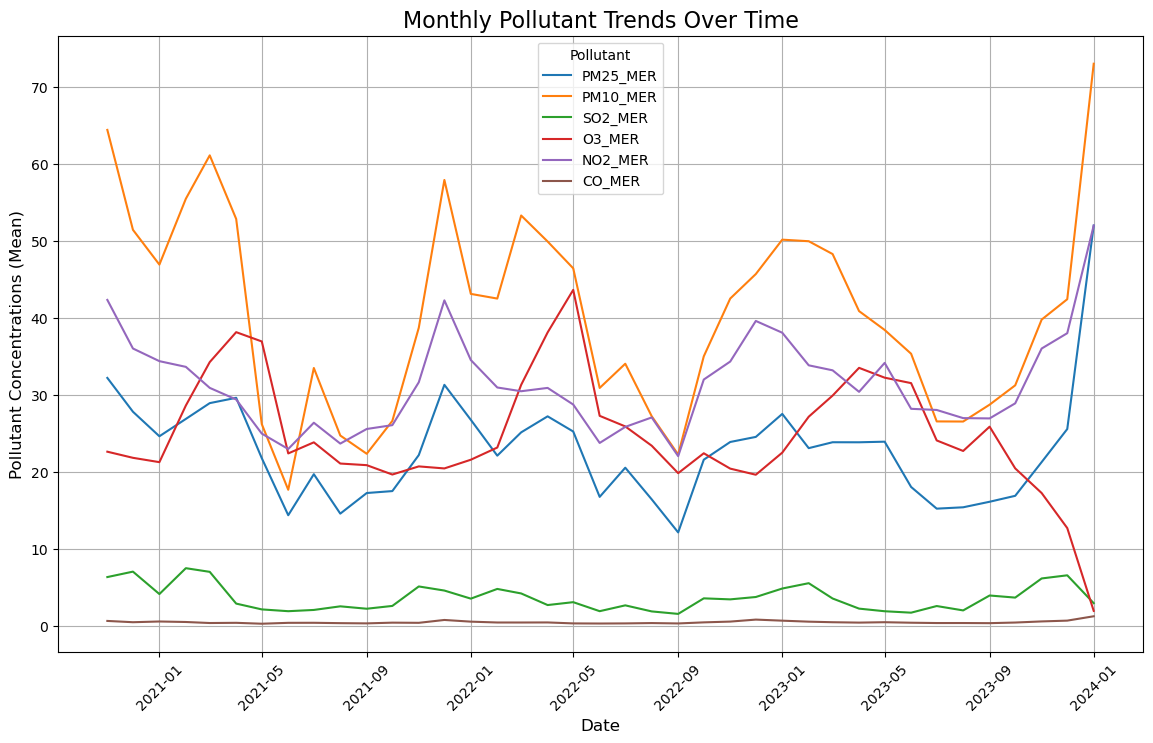

In [7]:
# Plot monthly averages of pollutants over time

import seaborn as sns

# Create a datetime column if not already created
monthly_country_city_summary['Date'] = pd.to_datetime(
    monthly_country_city_summary[['Year', 'Month']].assign(DAY=1)
)

# monthly_country_city_summary.head()

# Melt the DataFrame for seaborn compatibility
pollutant_melted = monthly_country_city_summary.melt(
    id_vars=['Date'], 
    value_vars=['PM25_MER', 'PM10_MER', 'SO2_MER', 'O3_MER', 'NO2_MER', 'CO_MER'],
    var_name='Pollutant',
    value_name='Concentration'
)

# Plot using seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(data=pollutant_melted, x='Date', y='Concentration', hue='Pollutant')

plt.title('Monthly Pollutant Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Pollutant Concentrations (Mean)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


### Bar Plot for Specific Months

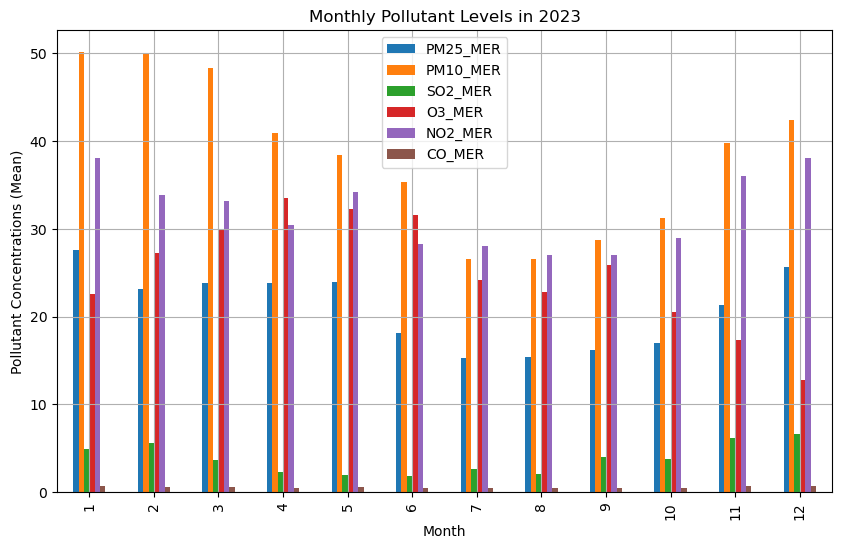

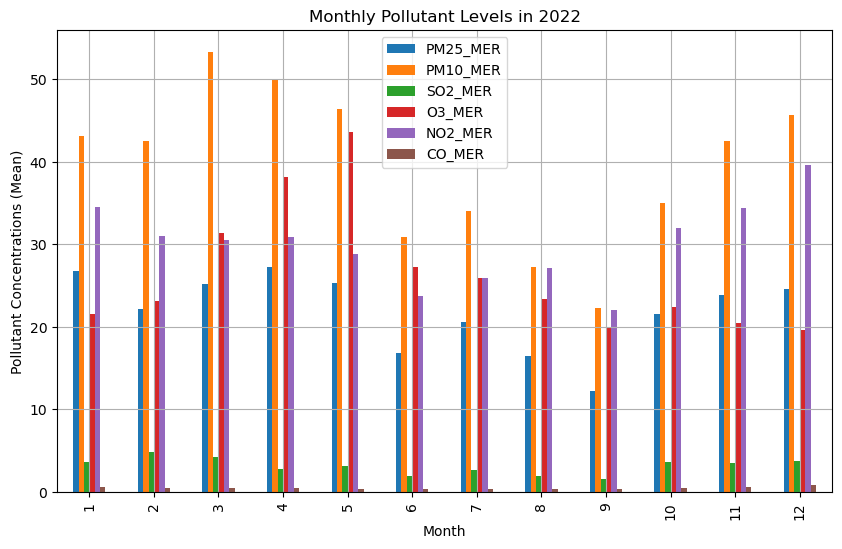

In [8]:

# Filter data for a specific year (e.g., 2023)
monthly_2023 = monthly_country_city_summary[monthly_country_city_summary['Year'] == 2023]
monthly_2022 = monthly_country_city_summary[monthly_country_city_summary['Year'] == 2022]
# Bar plot of pollutants for each month
monthly_2023.plot(
    x='Month',
    y=['PM25_MER', 'PM10_MER', 'SO2_MER', 'O3_MER', 'NO2_MER', 'CO_MER'],
    kind='bar',
    figsize=(10, 6),
    title='Monthly Pollutant Levels in 2023',
    grid=True
)
plt.xlabel('Month')
plt.ylabel('Pollutant Concentrations (Mean)')
plt.show()

monthly_2022.plot(
    x='Month',
    y=['PM25_MER', 'PM10_MER', 'SO2_MER', 'O3_MER', 'NO2_MER', 'CO_MER'],
    kind='bar',
    figsize=(10, 6),
    title='Monthly Pollutant Levels in 2022',
    grid=True
)
plt.xlabel('Month')
plt.ylabel('Pollutant Concentrations (Mean)')
plt.show()

# Analyse seasonal effect

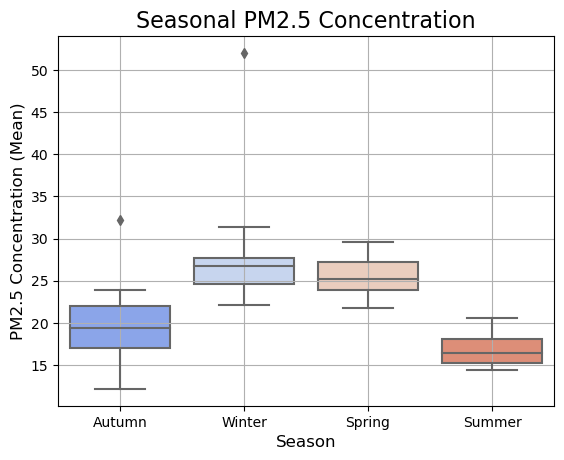

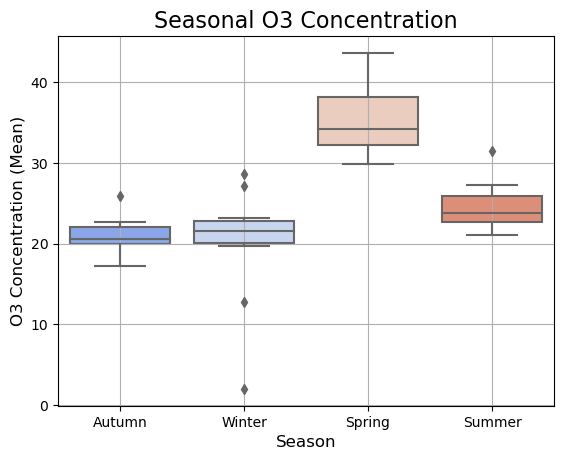

In [16]:
# 1.Monthly Boxplot for a Pollutant

# Add a 'Season' column based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

monthly_country_city_summary['Season'] = monthly_country_city_summary['Month'].apply(get_season)

# Boxplot of PM2.5 concentrations by season
sns.boxplot(
    x='Season',
    y='PM25_MER',
    data=monthly_country_city_summary,
    palette='coolwarm'
)
plt.title('Seasonal PM2.5 Concentration', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('PM2.5 Concentration (Mean)', fontsize=12)
plt.grid(True)
plt.show()

# Boxplot of O3 concentrations by season
sns.boxplot(
    x='Season',
    y='O3_MER',
    data=monthly_country_city_summary,
    palette='coolwarm'
)
plt.title('Seasonal O3 Concentration', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('O3 Concentration (Mean)', fontsize=12)
plt.grid(True)
plt.show()

Ozone (O₃) levels are typically higher in spring due to a combination of photochemical, meteorological, and natural factors.The peak in spring is often sharper than in summer because summer may see higher dispersion rates due to stronger winds or storms.

PM2.5 and PM10 Likely to be higher in winter due to temperature inversions, stagnant air, and heating activities.

# Correlation Analysis

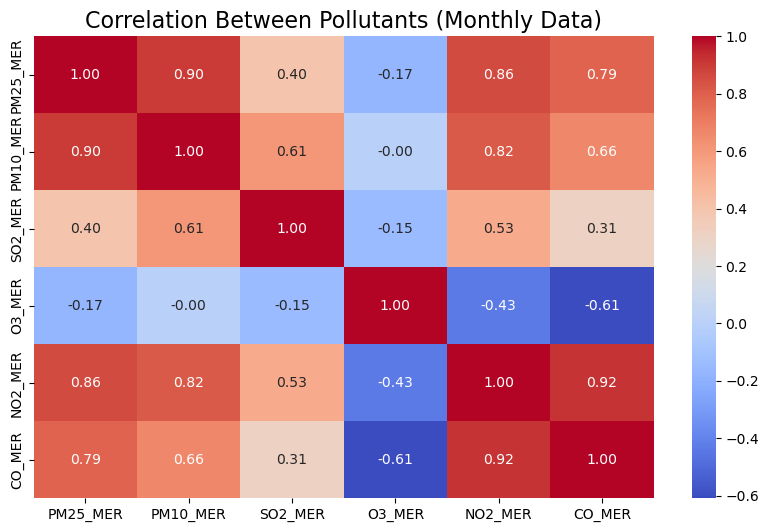

In [13]:
# Monthly Correlations


# Calculate correlation matrix for pollutants
correlation_matrix = monthly_country_city_summary[['PM25_MER', 'PM10_MER', 'SO2_MER', 'O3_MER', 'NO2_MER', 'CO_MER']].corr()

# Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Pollutants (Monthly Data)', fontsize=16)
plt.show()

### Festival days and pollutants

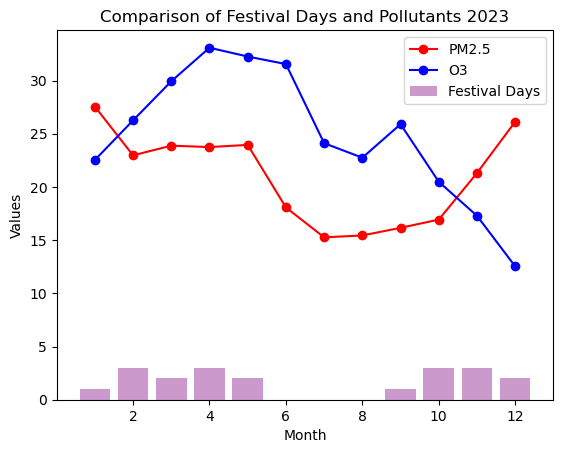

In [12]:
monthly_2023 = monthly_country_city_summary[monthly_country_city_summary['Year'] == 2023]

import matplotlib.pyplot as plt

# Plot lines for comparison
plt.plot(monthly_2023['Month'], monthly_2023['PM25_MER'], marker='o', label='PM2.5', color='red')
plt.plot(monthly_2023['Month'], monthly_2023['O3_MER'], marker='o', label='O3', color='blue')
plt.bar(monthly_2023['Month'], monthly_2023['festival_days'], alpha=0.4, label='Festival Days', color='purple')

plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Comparison of Festival Days and Pollutants 2023')
plt.legend()
plt.show()




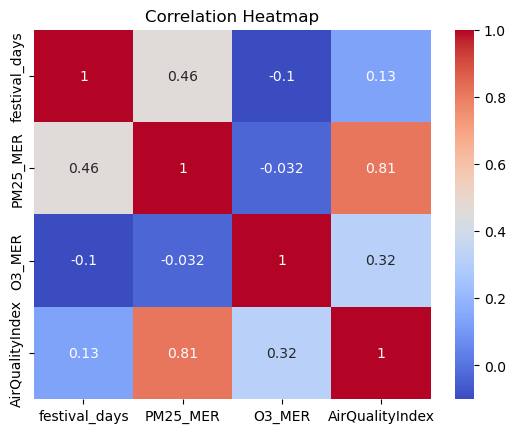

In [13]:
# Compute correlation matrix
correlation = monthly_2023[['festival_days', 'PM25_MER', 'O3_MER', 'AirQualityIndex']].corr()

# Plot heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()